## Kaggle Challenge: Advanced House Price Prediction

https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/overview

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
%matplotlib inline

In [2]:
os.listdir('data/')

['test.csv', 'data_description.txt', 'train.csv', 'sample_submission.csv']

In [3]:
df_train = pd.read_csv('data/train.csv')
df_train.drop('Id', axis=1, inplace=True)
df_test = pd.read_csv('data/test.csv')
df_test.drop('Id', axis=1, inplace=True)

In [4]:
df_test

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


## Basic EDA

In [5]:
# 79 feature columns
df_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [7]:
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [8]:
df_train.describe(include='object')

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


In [9]:
df_test.duplicated().sum()

0

## Missing Values

This is not a time series. So methods like imputation or rolling average do not work.

Let's use KNN Imputation for the numerical columns

For categorical columns: NaN values are actually valuable information (e.g. No Pool). Replace NaN with sth like 'No' 

To do this, I need to merge train and test first, then seperate the datasets according to dtypes, then impute separately, then merge again

In [10]:
from data_preprocessing import preprocess_missing
df_train, df_test = preprocess_missing(df_train,df_test)

## Visual EDA

In [11]:
df_train.select_dtypes(include='object').columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [12]:
df_train.select_dtypes(include=['int64','float64']).columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

<Axes: >

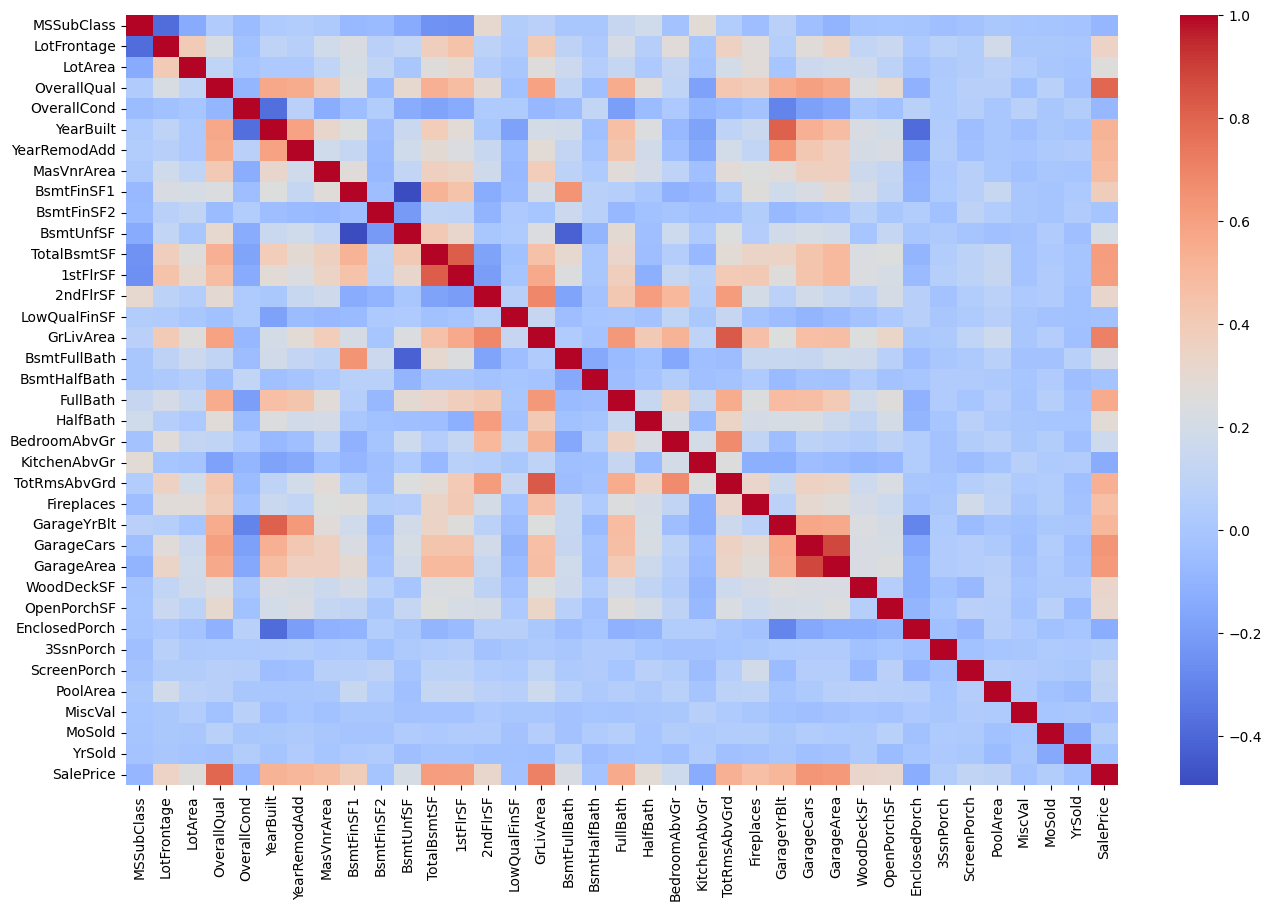

In [13]:
plt.figure(figsize=(16,10))
sns.heatmap(df_train.corr(), cmap='coolwarm', annot=False)
# High correlations among features: GarageCars, GarageYrBlt

<Axes: xlabel='SalePrice', ylabel='Count'>

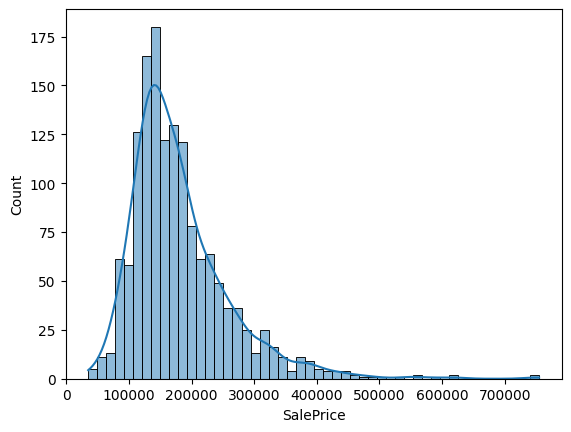

In [14]:
sns.histplot(x='SalePrice',data=df_train, bins=50, kde=True)

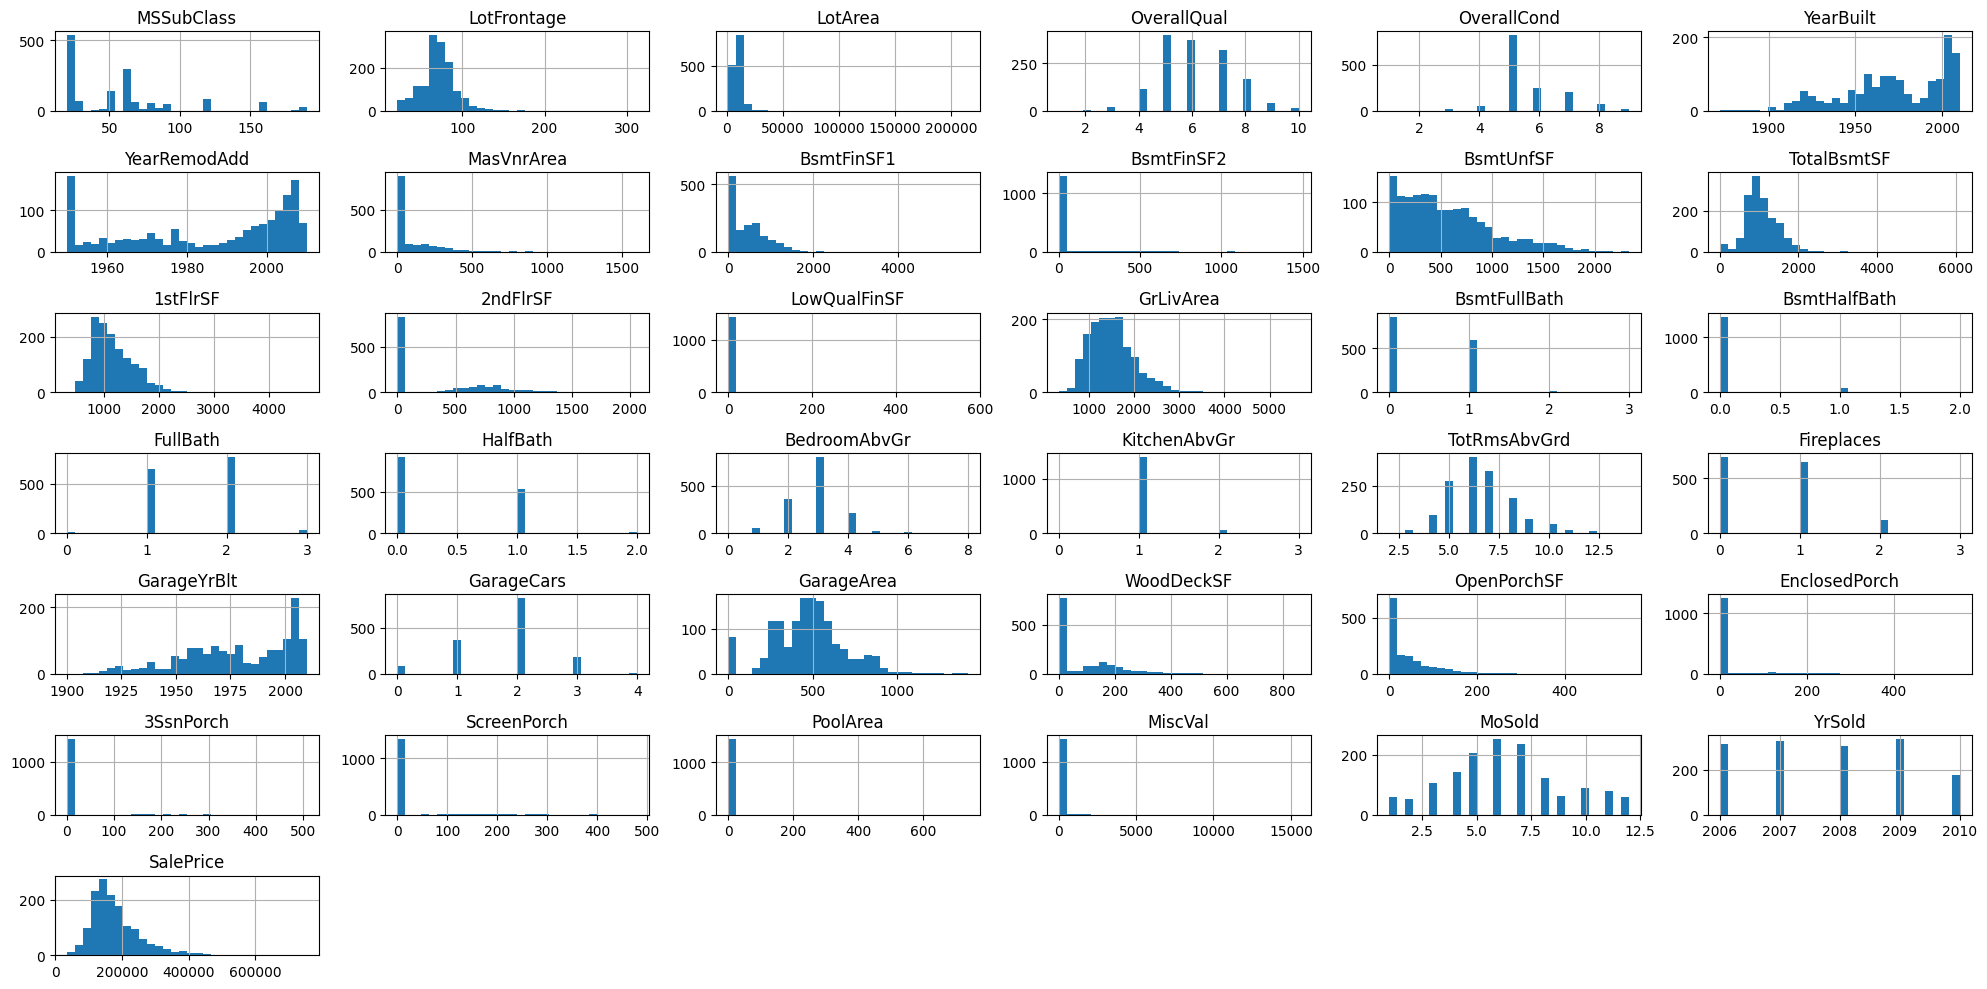

In [15]:
df_train.hist(bins=30, figsize=(20,10))
plt.tight_layout()

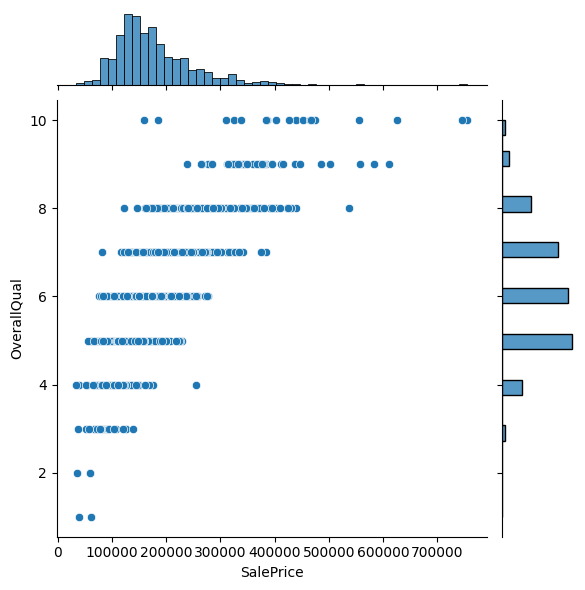

In [16]:
# High correlation with SalePrice: OverallQual, GrLivArea, GarageArea
sns.jointplot(x='SalePrice',y='OverallQual', data=df_train)

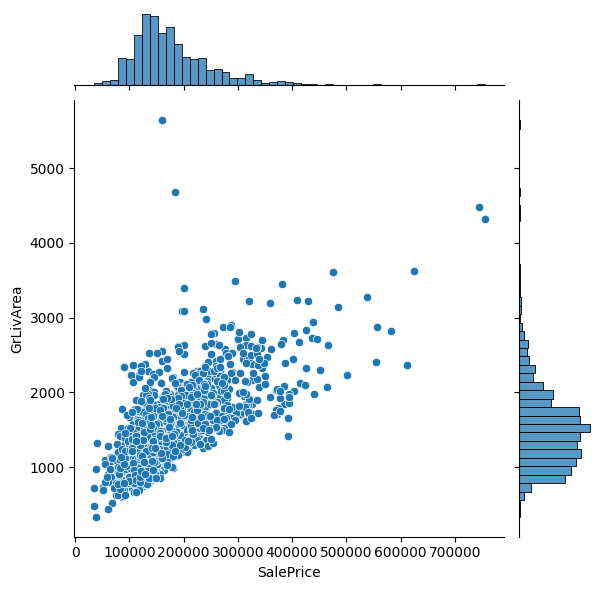

In [17]:
sns.jointplot(x='SalePrice',y='GrLivArea', data=df_train)
# Outliers: SalePrice > 700k, GrLivArea > 4000

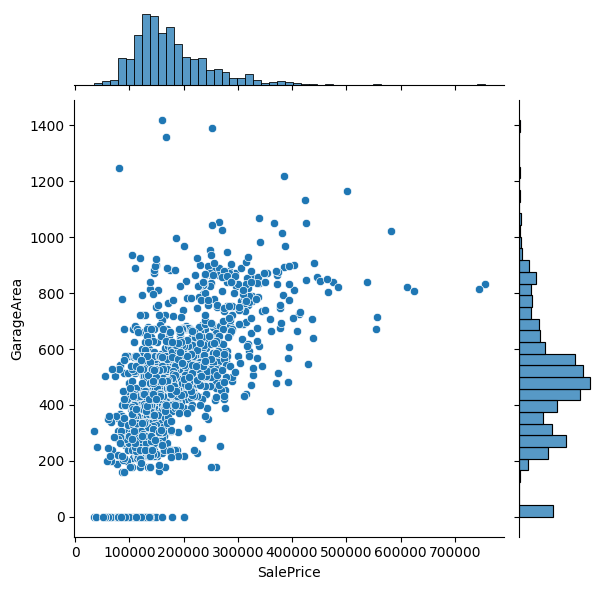

In [18]:
sns.jointplot(x='SalePrice',y='GarageArea', data=df_train)

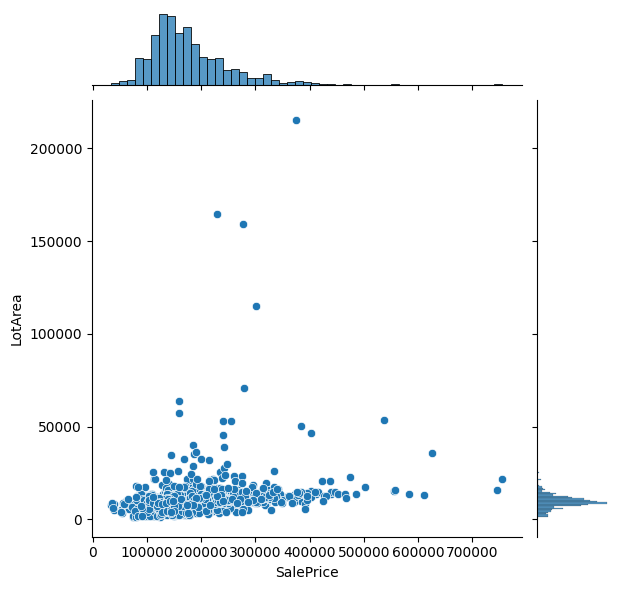

In [19]:
sns.jointplot(x='SalePrice',y='LotArea', data=df_train)
# Outlier: 1st Floor > 4000, Lotarea: >150000

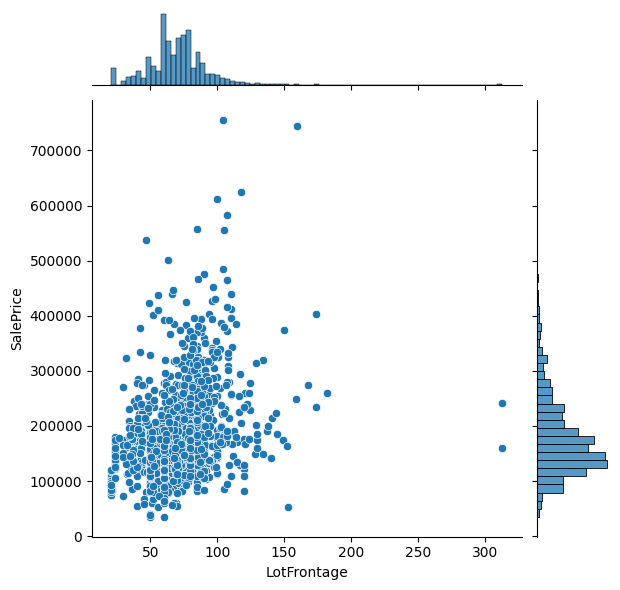

In [20]:
#sns.histplot(x='LotFrontage', data=df_train)
sns.jointplot(x='LotFrontage', y='SalePrice', data=df_train)
# Outlier: > 300

<Axes: xlabel='Neighborhood', ylabel='SalePrice'>

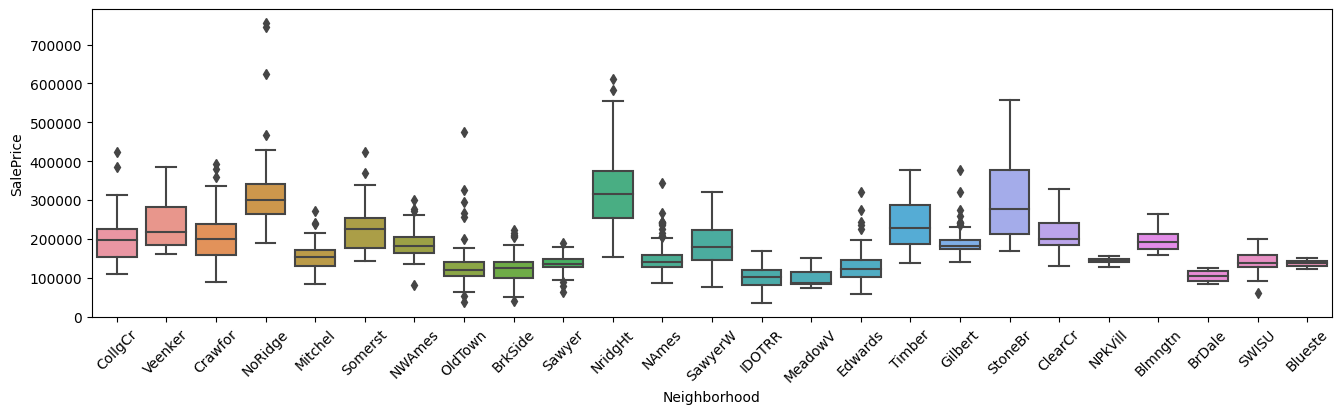

In [21]:
plt.figure(figsize=(16,4))
plt.xticks(rotation=45)
sns.boxplot(x='Neighborhood', y='SalePrice',data=df_train)

<Axes: xlabel='HouseStyle', ylabel='SalePrice'>

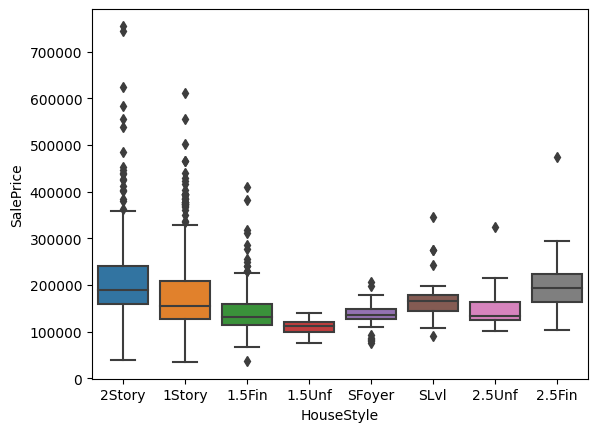

In [22]:
sns.boxplot(x='HouseStyle', y='SalePrice',data=df_train)

<Axes: xlabel='Neighborhood', ylabel='count'>

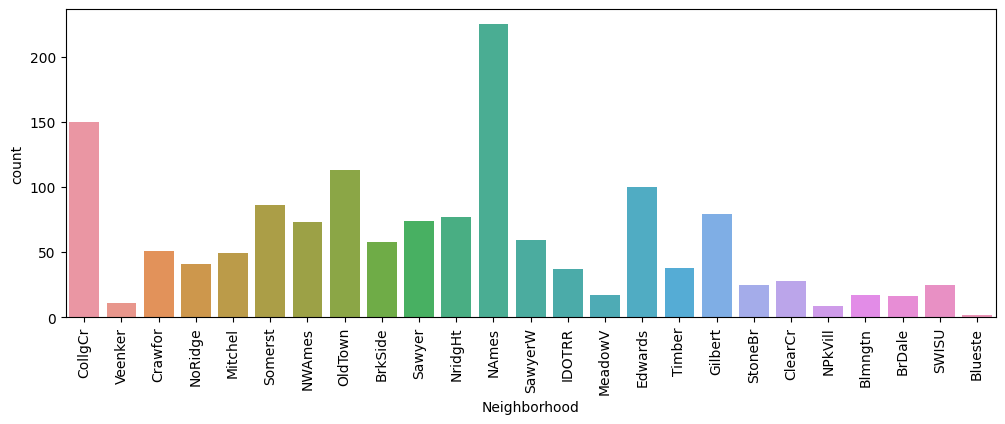

In [23]:
plt.figure(figsize=(12,4))
plt.xticks(rotation=90)

sns.countplot(x='Neighborhood', data=df_train)

<Axes: xlabel='MSZoning', ylabel='SalePrice'>

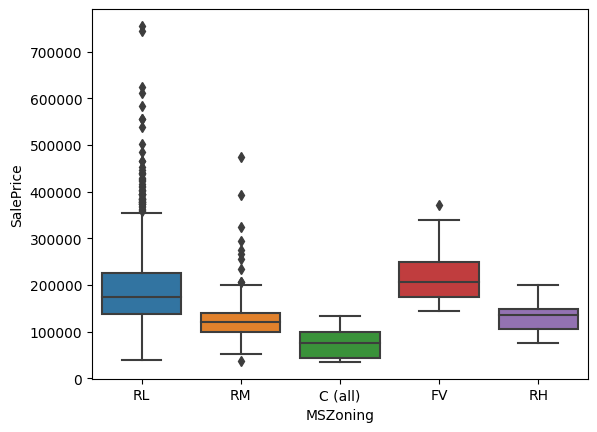

In [24]:
sns.boxplot(x='MSZoning', y='SalePrice', data=df_train)

<Axes: xlabel='LandContour', ylabel='SalePrice'>

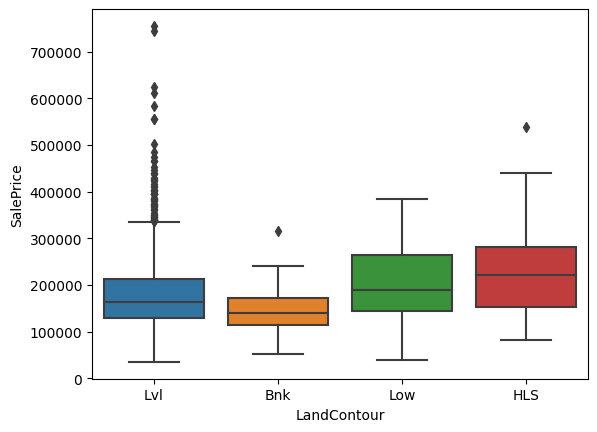

In [25]:
sns.boxplot(x='LandContour', y='SalePrice', data=df_train)

<Axes: xlabel='YearBuilt', ylabel='SalePrice'>

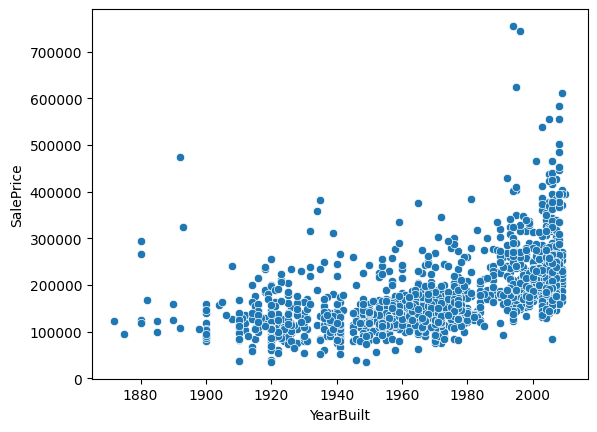

In [26]:
#sns.scatterplot(x='YearRemodAdd', y='SalePrice', data=df_train)
sns.scatterplot(x='YearBuilt', y='SalePrice', data=df_train)

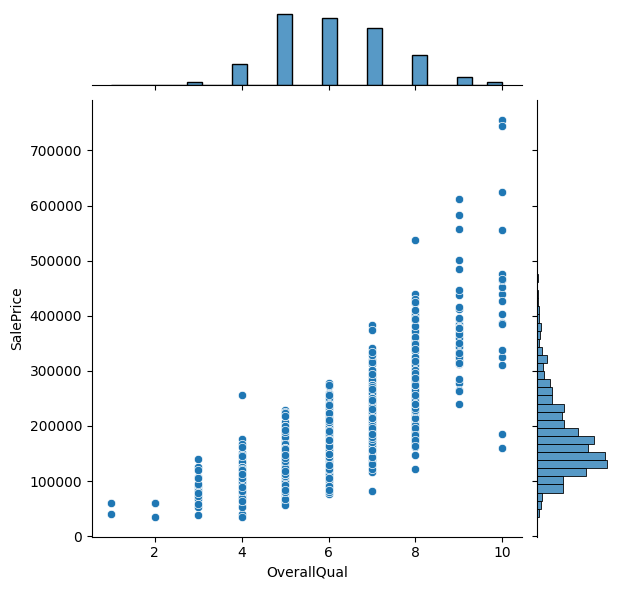

In [27]:
sns.jointplot(x='OverallQual', y='SalePrice', data=df_train)

<Axes: xlabel='BsmtCond', ylabel='SalePrice'>

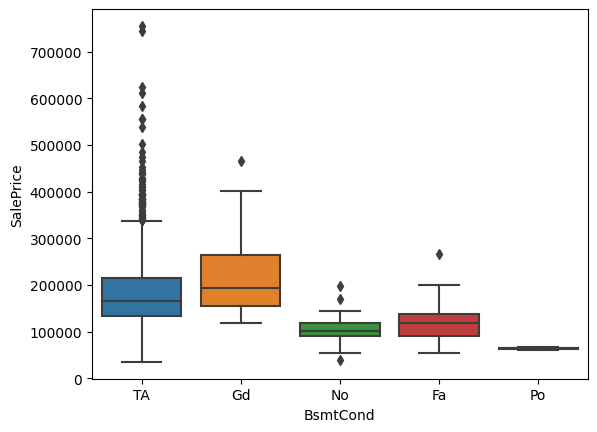

In [28]:
sns.boxplot(x='BsmtCond', y='SalePrice', data=df_train)

<Axes: xlabel='SalePrice', ylabel='Count'>

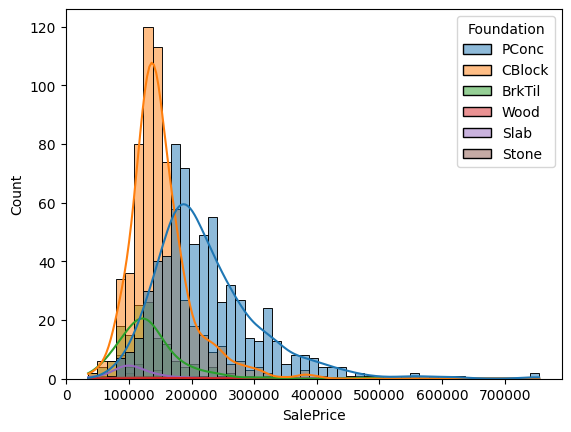

In [29]:
sns.histplot(x='SalePrice', data=df_train, hue='Foundation', kde=True) #This just tells me how many from the hue correspond to which value of the target

## Drop Outliers

In [30]:
df_train.shape

(1460, 80)

In [31]:
from data_preprocessing import drop_outliers

df_train = drop_outliers(df_train)

## Log-Transformation

We need to log-transform the target variable, because it's skewed and because the competition requires to compute RMSE on the log-transformed saleprice

<Axes: xlabel='SalePrice', ylabel='Count'>

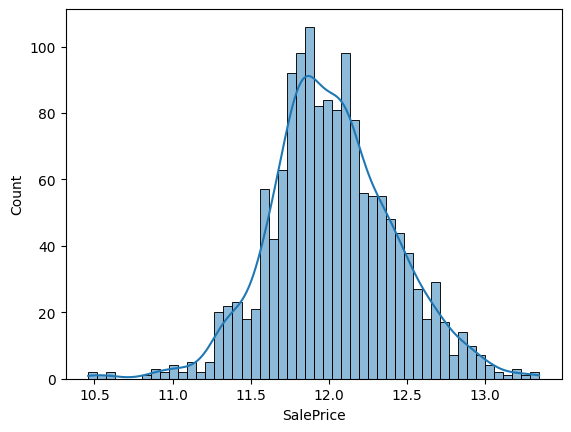

In [32]:
df_train["SalePrice"] = np.log1p(df_train["SalePrice"])
sns.histplot(x='SalePrice', data=df_train, bins=50, kde=True)
# More normal distributed now

## Feature Engineering

Check what features could be combined together. Again, let's consider categorical and numerical separately

In [33]:
from feature_engineering import new_feats, drop_feats, encode, split_merged
df_merged = new_feats(df_train,df_test)
df_merged = drop_feats(df_merged)
df_merged = encode(df_merged)
df_train, df_test = split_merged(df_merged, df_train)

In [34]:
new_cols = [str(col) for col in df_train.columns]
df_train.columns = new_cols

new_cols = [str(col) for col in df_test.columns]
df_test.columns = new_cols

In [35]:
df_train # Taken care of outliers, Feature engineering, Encoding, missing values

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SalePrice
0,60.0,65.0,8450.0,7.0,5.0,2003.0,2003.0,196.0,706.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,12.247699
1,20.0,80.0,9600.0,6.0,8.0,1976.0,1976.0,0.0,978.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,12.109016
2,60.0,68.0,11250.0,7.0,5.0,2001.0,2002.0,162.0,486.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,12.317171
3,70.0,60.0,9550.0,7.0,5.0,1915.0,1970.0,0.0,216.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,11.849405
4,60.0,84.0,14260.0,8.0,5.0,2000.0,2000.0,350.0,655.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,12.429220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1447,60.0,62.0,7917.0,6.0,5.0,1999.0,2000.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,12.072547
1448,20.0,85.0,13175.0,6.0,6.0,1978.0,1988.0,119.0,790.0,163.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,12.254868
1449,70.0,66.0,9042.0,7.0,9.0,1941.0,2006.0,0.0,275.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,12.493133
1450,20.0,68.0,9717.0,5.0,6.0,1950.0,1996.0,0.0,49.0,1029.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,11.864469


In [36]:
df_test

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,20.0,80.0,11622.0,5.0,6.0,1961.0,1961.0,0.0,468.0,144.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,20.0,81.0,14267.0,6.0,6.0,1958.0,1958.0,108.0,923.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,60.0,74.0,13830.0,5.0,5.0,1997.0,1998.0,0.0,791.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,60.0,78.0,9978.0,6.0,6.0,1998.0,1998.0,20.0,602.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,120.0,43.0,5005.0,8.0,5.0,1992.0,1992.0,0.0,263.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160.0,21.0,1936.0,4.0,7.0,1970.0,1970.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1455,160.0,21.0,1894.0,4.0,5.0,1970.0,1970.0,0.0,252.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1456,20.0,160.0,20000.0,5.0,7.0,1960.0,1996.0,0.0,1224.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1457,85.0,62.0,10441.0,5.0,5.0,1992.0,1992.0,0.0,337.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


## Modeling: Random Forest, XGBoost, Lasso Reg

In [37]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


In [38]:
# Random Forest without data scaling
rfmodel = RandomForestRegressor()
xgmodel = XGBRegressor()
ridge = make_pipeline(StandardScaler(), Ridge())

In [39]:
X = df_train.drop('SalePrice', axis=1)
y = df_train['SalePrice']

In [40]:
new_cols = [str(col) for col in X.columns]
X.columns = new_cols

In [41]:
# On training data
def RMSLE(y_test, y_pred):
    return np.sqrt(mean_squared_error(y_test, y_pred)) #Root Mean Squared Logarithmic Error, because y and y_pred are logarithmic transformed

print(f"Random Forest RMSLE on training data: {RMSLE(y, rfmodel.fit(X,y).predict(X))}")
print(f"XGBoost RMSLE on training data: {RMSLE(y, xgmodel.fit(X,y).predict(X))}")
print(f"Ridge Regression RMSLE on training data: {RMSLE(y, ridge.fit(X,y).predict(X))}")

Random Forest RMSLE on training data: 0.05160944999651483
XGBoost RMSLE on training data: 0.00962719123137665
Ridge Regression RMSLE on training data: 0.09576995183076105


In [42]:
crossval = KFold(n_splits=6, shuffle=True)

def compute_cv_rmsle(model,X,y,cv):
    RMSLE_cv = np.sqrt(-cross_val_score(model, X, y, cv=cv, scoring='neg_mean_squared_error'))
    return RMSLE_cv.mean()

print(f"Random Forest RMSLE from Crossval: {compute_cv_rmsle(rfmodel, X, y, crossval)}")
print(f"XGBoost RMSLE from Crossval: {compute_cv_rmsle(xgmodel, X, y, crossval)}")
print(f"Ridge RMSLE from Crossval: {compute_cv_rmsle(ridge, X, y, crossval)}")

Random Forest RMSLE from Crossval: 0.13904469171772868
XGBoost RMSLE from Crossval: 0.13567200563608142
Ridge RMSLE from Crossval: 0.12108557966181473


## Submission
To submit the predictions, I need to predict on the unseen test data set df_test and then revert the log transformation of the target variable

Ridge Regression performed best, suprisingly


In [43]:
os.listdir('data/')
pd.read_csv('data/sample_submission.csv')

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977
...,...,...
1454,2915,167081.220949
1455,2916,164788.778231
1456,2917,219222.423400
1457,2918,184924.279659


In [44]:
ridge.fit(X,y)
y_pred_log = ridge.predict(df_test)
y_pred = np.expm1(y_pred_log)  # this reverts the log1p transformation

y_pred = pd.Series(data=y_pred, name='SalePrice')

In [45]:
y_pred

0       124461.994145
1       162118.587957
2       182100.008182
3       203301.972701
4       193303.964654
            ...      
1454     82964.860848
1455     81524.484061
1456    175515.516561
1457    113026.477410
1458    209897.503371
Name: SalePrice, Length: 1459, dtype: float64